<a href="https://colab.research.google.com/github/jferreiraz/LinerRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library import

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Import data (Unchanged)

In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-12-01 22:58:13--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2022-12-01 22:58:14 (4.09 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


Dummies from pandas

In [3]:
# Generate dummies for sex
dataset = pd.concat([dataset,pd.get_dummies(dataset['sex'],prefix="sex")],axis=1)
dataset.drop('sex', axis=1, inplace=True)

# Generate dummies for smoker
dataset = pd.concat([dataset,pd.get_dummies(dataset['smoker'],prefix="smoker")],axis=1)
dataset.drop('smoker', axis=1, inplace=True)

# Generate dummies for region
dataset = pd.concat([dataset,pd.get_dummies(dataset['region'],prefix="region")],axis=1)
dataset.drop('region', axis=1, inplace=True)
dataset

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1


Variables

In [4]:
x_columns = dataset.columns.drop('expenses')
x = dataset[x_columns].values
y = dataset['expenses'].values

train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, train_size=0.8)

Neural Network

In [7]:
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu'))#relu
model.add(Dense(25, activation='relu'))#relu
model.add(Dense(1))
model.compile(loss='mean_absolute_error', metrics=["mean_absolute_error", "mean_squared_error"], optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=True)
model.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), callbacks=[monitor], verbose=2, epochs=480)

Epoch 1/480
34/34 - 2s - loss: 13043.4365 - mean_absolute_error: 13043.4365 - mean_squared_error: 312746816.0000 - val_loss: 14131.9346 - val_mean_absolute_error: 14131.9346 - val_mean_squared_error: 360886016.0000 - 2s/epoch - 44ms/step
Epoch 2/480
34/34 - 0s - loss: 13017.9346 - mean_absolute_error: 13017.9346 - mean_squared_error: 312032192.0000 - val_loss: 14100.4512 - val_mean_absolute_error: 14100.4512 - val_mean_squared_error: 359931168.0000 - 256ms/epoch - 8ms/step
Epoch 3/480
34/34 - 0s - loss: 12973.0439 - mean_absolute_error: 12973.0439 - mean_squared_error: 310785760.0000 - val_loss: 14035.4043 - val_mean_absolute_error: 14035.4043 - val_mean_squared_error: 357967008.0000 - 131ms/epoch - 4ms/step
Epoch 4/480
34/34 - 0s - loss: 12881.7539 - mean_absolute_error: 12881.7539 - mean_squared_error: 308266656.0000 - val_loss: 13908.1699 - val_mean_absolute_error: 13908.1699 - val_mean_squared_error: 354158464.0000 - 114ms/epoch - 3ms/step
Epoch 5/480
34/34 - 0s - loss: 12712.7490 

Test Base (Unchanged)

9/9 - 0s - loss: 2702.7429 - mean_absolute_error: 2702.7429 - mean_squared_error: 34597896.0000 - 32ms/epoch - 4ms/step
Testing set Mean Abs Error: 2702.74 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


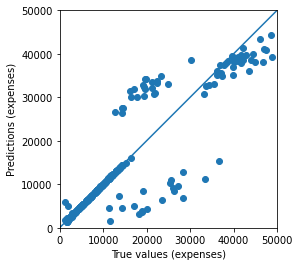

In [8]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)